# CA Multiple Linear Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import seaborn as sns
import statsmodels.api as sm

### Importing the dataset 

In [5]:
#Importing the data
mlr6_data = pd.read_csv("mlr6.csv")

In [6]:
#first 5 rows of the data set
mlr6_data.head()

,y,x1,x2,x3
0,16270.189819,54.290459,196.243633,C
1,18169.456998,54.065187,204.141635,A
2,15559.583612,51.437386,198.786582,A
3,16087.907983,52.206995,194.490189,C
4,16374.396237,55.142860,197.968667,C


The column x3 is in categorical values, using the one-hot enconding we will transform in numerical value, so we can continue with the multiple linear regression model

In [8]:
# One-hot encode categorical variable 'x3'
mlr6_data = pd.get_dummies(mlr6_data, columns=['x3'], drop_first=True)

The drop-first removes one of the binary columns to avoid multicollinearity (one column can be predicted from the others), and by dropping the first category, we reduce redundancy

In [10]:
mlr6_data.head()

,y,x1,x2,x3_B,x3_C
0,16270.189819,54.290459,196.243633,False,True
1,18169.456998,54.065187,204.141635,False,False
2,15559.583612,51.437386,198.786582,False,False
3,16087.907983,52.206995,194.490189,False,True
4,16374.396237,55.142860,197.968667,False,True


If x3_B and x3_C are False, we can predict the A is True

Checking the type of the columns

In [13]:
mlr6_data.dtypes

y       float64
x1      float64
x2      float64
x3_B       bool
x3_C       bool
dtype: object

Need to convert the boolean values to integer/float values before apply the model

In [15]:
mlr6_data['x3_B'] = mlr6_data['x3_B'].astype(int)
mlr6_data['x3_C'] = mlr6_data['x3_C'].astype(int)
mlr6_data.head()

,y,x1,x2,x3_B,x3_C
0,16270.189819,54.290459,196.243633,0,1
1,18169.456998,54.065187,204.141635,0,0
2,15559.583612,51.437386,198.786582,0,0
3,16087.907983,52.206995,194.490189,0,1
4,16374.396237,55.142860,197.968667,0,1


### Spliting the data set in train and test partitions, with the seed corresponding the student number

In [17]:
student_number = 23436786
mlr6_train, mlr6_test = train_test_split( mlr6_data, test_size=0.2, random_state=student_number)

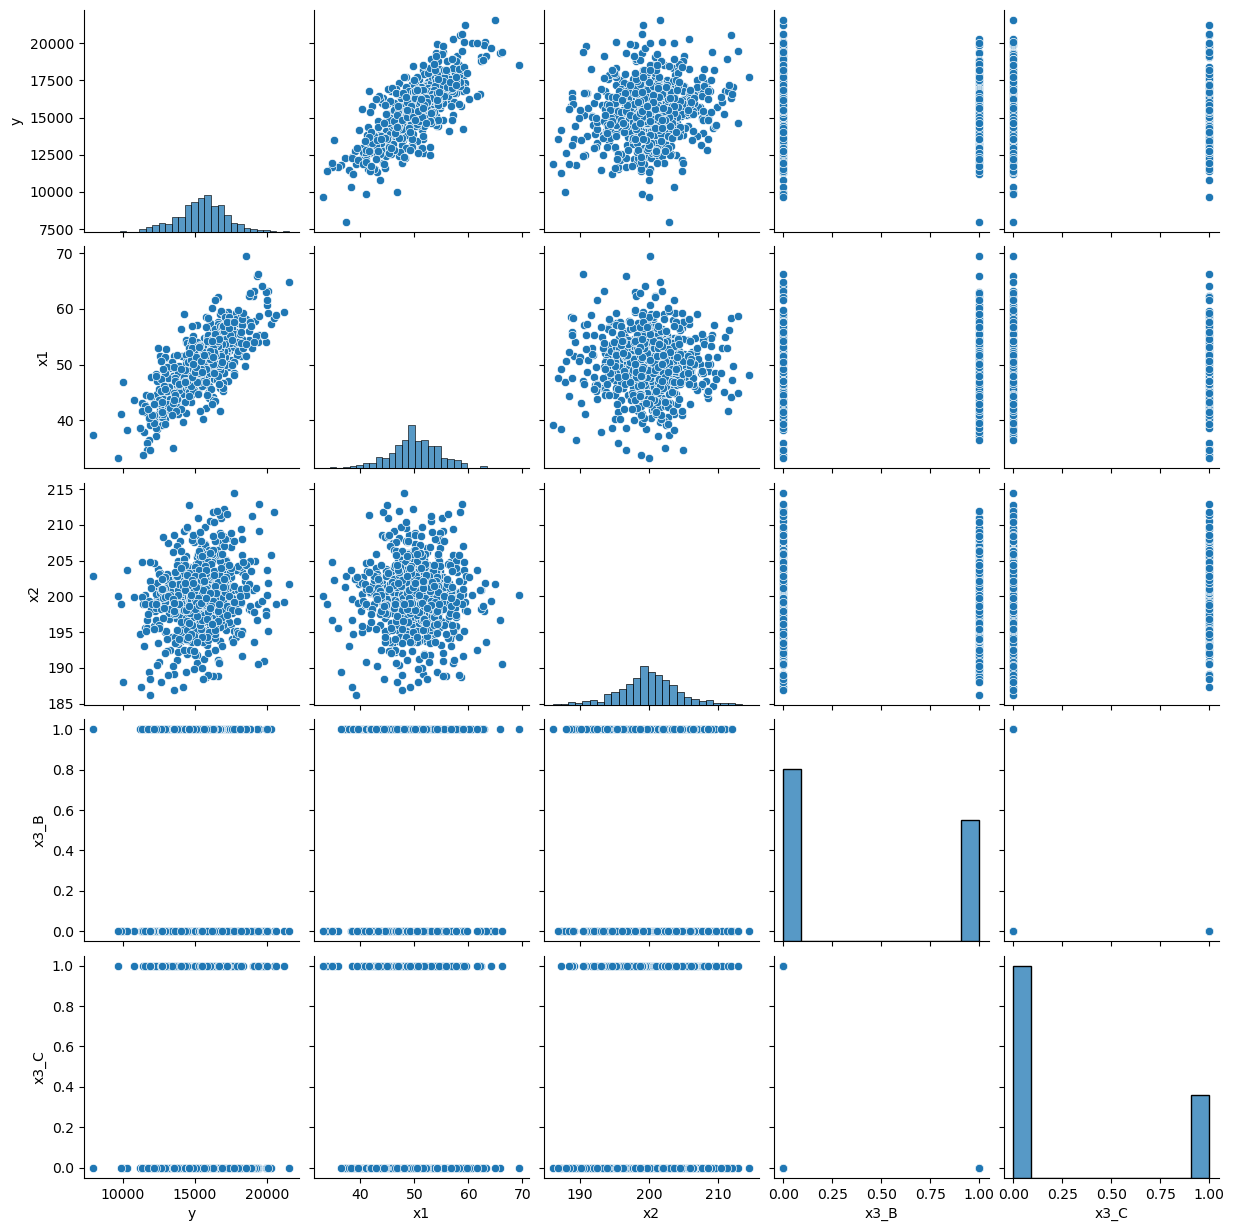

In [18]:
sns.pairplot(mlr6_train)

In [19]:
x = mlr6_train[["x1","x2","x3_B","x3_C"]]
x = sm.add_constant(x)
mlr6_model = sm.OLS(
    mlr6_train['y'],
    x
)
fit = mlr6_model.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     369.2
Date:                Sun, 24 Nov 2024   Prob (F-statistic):          1.38e-179
Time:                        17:16:26   Log-Likelihood:                -6702.4
No. Observations:                 800   AIC:                         1.341e+04
Df Residuals:                     795   BIC:                         1.344e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.507e+04   1783.246     -8.450      0.0

## Coefficient and P-value analysis 

-  The _const_ coefficient value indicates that the value of _y_ (dependent variable) will be -1.507e+04 when all the independent variables are at 0.

- The value for the _x1_ coefficient indicates that the value of _y_ will change by 282.8539 when the value of _x1_ changes by 1 and all the other _x_ variables are unchanged. This variable has a __highly significant p-value__ of 0.000, meaning it is __strongly contributing to the model__.

-  The value for the _x2_ coefficient indicates that the value of _y_ will change by 82.5952 when the value of _x2_ changes by 1 and all the other _x_ variables are unchanged. This variable has a __significant p-value__ of 0.000, meaning it is __contributing to the model__.

- The value for the _x3_B_ (assuming x3_C is 0 and x3_B = 1) coefficient indicates that the value of _y_ will decrease by 247.4317 when the value of _x3_B_ changes by 1 and all the other _x_ variables are unchanged. This variable is __significant with a p-value__ of 0.006, suggesting a __strong relationship__ with the dependent variable.

-  The value for the _x3_C_ (assuming x3_C = 1 and x3_B is 0) coefficient indicates that the value of _y_ will decrease by 56.7738 when the value _x3_C_ changes by 1 and all the other _x_ variables are unchanged. This variable is __not statistically significant__, as the p-value is 0.561, which is much higher than the typical alpha of 0.05, and may not be necessary.

## F-Statistic and Prob (F-statistic) analysis

- This _p-value_ for the overall _F-statistic_ of the model. A high F-statistic value (369.2) and the very low _p-value_ (1.38e-179) indicate that the model as a whole is __statistically significant__.
The model is __highly likely to be a good fit for the data__.

## 